In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [28]:
def deriv(y,t,N,lambda_,delta,gamma,alpha,rho):
    S,E,I,R,D=y
    dSdt=-(lambda_(t)*I*S)
    dEdt=((lambda_(t)*I*S))-delta*E
    dIdt=delta*E-gamma*(1-alpha)*I-rho*alpha*I
    dRdt=gamma*(1-alpha)*I
    dDdt=rho*alpha*I
    
    return dSdt,dEdt,dIdt,dRdt,dDdt

In [45]:
L=40
N=100000000
D=7.0
gamma=1.0/14
alpha=0.1
rho=1/9
delta=1.0/10

def lambda_(t):
    if t<L:
        return 2.1/N
    else:
        return 0.9/N

S0,E0,I0,R0,D0=N-1,1,0,0,0

In [46]:
t=np.linspace(0,150,150)
y0=S0,E0,I0,R0,D0

ret=odeint(deriv,y0,t,args=(N,lambda_,delta,gamma,alpha,rho))
S,E,I,R,D=ret.T

In [47]:
def plotting ( t, S,E,I,R,D):
    f,ax=plt.subplots(1,1,figsize=(20,10))
    ax.plot(t,S,'black',alpha=0.7,linewidth=2,label='Susceptible')
    ax.plot(t,E,'blue',alpha=0.7,linewidth=2,label='Exposed')
    ax.plot(t,I,'green',alpha=0.7,linewidth=2,label='Infected')
    ax.plot(t,R,'magenta',alpha=0.7,linewidth=2,label='Recovered')
    ax.plot(t,D,'red',alpha=0.7,linewidth=2,label='Dead')
    ax.plot(t,S+E+I+R+D,'c--',alpha=0.7,linewidth=2,label='Total')
    ax.set_xlabel('Time(Days)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    plt.legend()
    plt.show()

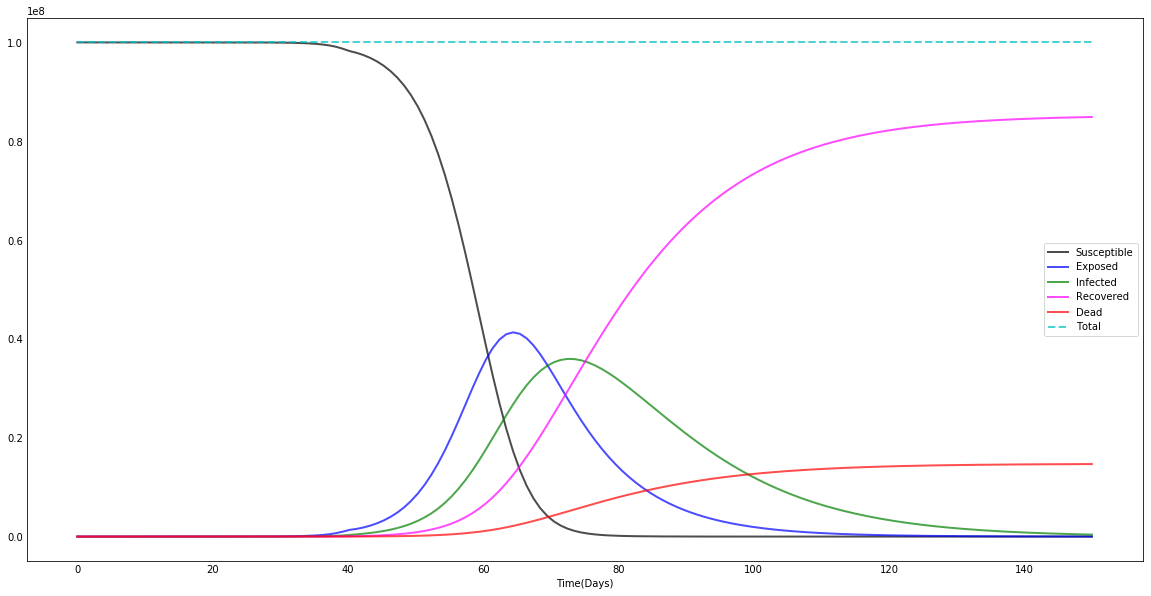

In [48]:
plotting(t,S,E,I,R,D)